In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from keras import backend as K
from keras.layers import Layer,InputSpec
import keras.layers as kl
from glob import glob
from sklearn.metrics import roc_curve, auc
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_auc_score
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from  matplotlib import pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate,Dense, Conv2D, MaxPooling2D, Flatten,Input,Activation,add,AveragePooling2D,BatchNormalization,Dropout
%matplotlib inline
import shutil
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
%cd /content/drive/MyDrive/Project_Brain tumor/Data
%cp -av Train/ /content/Train

Streaming output truncated to the last 5000 lines.
'Train/3/_24_2323901.jpg' -> '/content/Train/3/_24_2323901.jpg'
'Train/3/_595_2439770.jpg' -> '/content/Train/3/_595_2439770.jpg'
'Train/3/_106_693930.jpg' -> '/content/Train/3/_106_693930.jpg'
'Train/3/_151_8784002.jpg' -> '/content/Train/3/_151_8784002.jpg'
'Train/3/_225_656721.jpg' -> '/content/Train/3/_225_656721.jpg'
'Train/3/_619_78741.jpg' -> '/content/Train/3/_619_78741.jpg'
'Train/3/_68_5865642.jpg' -> '/content/Train/3/_68_5865642.jpg'
'Train/3/_684_9759731.jpg' -> '/content/Train/3/_684_9759731.jpg'
'Train/3/_557_5001273.jpg' -> '/content/Train/3/_557_5001273.jpg'
'Train/3/_598_5945116.jpg' -> '/content/Train/3/_598_5945116.jpg'
'Train/3/_266_6286128.jpg' -> '/content/Train/3/_266_6286128.jpg'
'Train/3/_789_1501818.jpg' -> '/content/Train/3/_789_1501818.jpg'
'Train/3/_487_8387841.jpg' -> '/content/Train/3/_487_8387841.jpg'
'Train/3/_94_5532443.jpg' -> '/content/Train/3/_94_5532443.jpg'
'Train/3/_497_7018635.jpg' -> '/content

In [ ]:
train_path = '/content/Train'
test_path = '/content/Test'
batch_size = 16


In [ ]:
datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

In [ ]:
image_size = 299
print("\nTrain Batches: ")
train_batches = datagen.flow_from_directory(directory=train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=batch_size,
                                            shuffle=True)

print("\nTest Batches: ")
test_batches =datagen.flow_from_directory(test_path,
                                           target_size=(image_size,image_size),
                                           batch_size=batch_size,
                                           shuffle=False)


Train Batches: 
Found 23234 images belonging to 3 classes.

Test Batches: 
Found 460 images belonging to 3 classes.


In [ ]:

irv2 = tf.keras.applications.InceptionResNetV2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classifier_activation="softmax",

)

# Exclude the last 28 layers of the model.
conv = irv2.layers[-28].output


225209952/225209952 [==============================] - 1s 0us/step


In [ ]:


conv  = Activation('relu')(conv)
conv = Dropout(0.5)(conv)


In [ ]:

output = Flatten()(conv)
output = Dense(3, activation='softmax')(output)
model = Model(inputs=irv2.input, outputs=output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [ ]:
opt1=tf.keras.optimizers.Adam(learning_rate=0.01,epsilon=0.1)
model.compile(optimizer=opt1,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
class_weights = {
                    0: 1.0,
                    1: 1.0,
                    2: 1.0,

                }


checkpoint=  ModelCheckpoint(filepath = 'saved_model.hdf5',monitor='val_accuracy',save_best_only=True,save_weights_only=True)




In [ ]:
Earlystop = EarlyStopping(monitor='val_loss', mode='min',patience=30, min_delta=0.001)
history = model.fit(train_batches,
                    steps_per_epoch=(2600/10),
                    epochs=20,
                    verbose=2,
                    validation_data=test_batches,validation_steps=400/batch_size,callbacks=[checkpoint,Earlystop],class_weight=class_weights)

Epoch 1/20
260/260 - 256s - loss: 0.5164 - accuracy: 0.8097 - val_loss: 4.9058 - val_accuracy: 0.5600 - 256s/epoch - 986ms/step
Epoch 2/20
260/260 - 156s - loss: 0.3309 - accuracy: 0.8942 - val_loss: 1.0447 - val_accuracy: 0.7725 - 156s/epoch - 601ms/step
Epoch 3/20
260/260 - 155s - loss: 0.2426 - accuracy: 0.9262 - val_loss: 0.0864 - val_accuracy: 0.9775 - 155s/epoch - 596ms/step
Epoch 4/20
260/260 - 149s - loss: 0.1370 - accuracy: 0.9474 - val_loss: 0.2374 - val_accuracy: 0.9400 - 149s/epoch - 571ms/step
Epoch 5/20
260/260 - 149s - loss: 0.1352 - accuracy: 0.9591 - val_loss: 0.5733 - val_accuracy: 0.7900 - 149s/epoch - 573ms/step
Epoch 6/20
260/260 - 149s - loss: 0.1223 - accuracy: 0.9570 - val_loss: 0.1416 - val_accuracy: 0.9525 - 149s/epoch - 573ms/step
Epoch 7/20
260/260 - 149s - loss: 0.0727 - accuracy: 0.9733 - val_loss: 0.1098 - val_accuracy: 0.9725 - 149s/epoch - 573ms/step
Epoch 8/20
260/260 - 150s - loss: 0.0715 - accuracy: 0.9748 - val_loss: 0.0667 - val_accuracy: 0.9775 - 

In [ ]:
from tensorflow.keras import models
model.load_weights("saved_model.hdf5")

In [ ]:
predictions = model.predict(test_batches, steps=460/batch_size, verbose=0)

In [ ]:
#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['1', '2', '3']
#getting the true labels per image
y_true = test_batches.classes
#getting the predicted labels per image
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       106
           2       0.98      1.00      0.99       214
           3       1.00      0.99      0.99       140

    accuracy                           0.99       460
   macro avg       0.99      0.98      0.99       460
weighted avg       0.99      0.99      0.99       460



In [ ]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='weighted')))

Precision: 0.9870353302611367
Recall: 0.9869565217391304
Accuracy: 0.9869565217391304
weighted Roc score: 0.999412507826027


In [ ]:

print("Precision: "+ str(precision_score(y_true, y_pred, average='macro')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='macro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("Macro Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='macro')))

Precision: 0.9875064004096261
Recall: 0.9842465005751905
Accuracy: 0.9869565217391304
Macro Roc score: 0.9994106074284098


In [ ]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='micro')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='micro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
tpr={}
fpr={}
roc_auc={}
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("Micro Roc score: " + str(roc_auc["micro"]))

Precision: 0.9869565217391304
Recall: 0.9869565217391304
Accuracy: 0.9869565217391304
Micro Roc score: 0.9993809073724007


In [ ]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    r = roc_auc_score(y_test[:, i], y_prob[:, i])
    print("The ROC AUC score of "+targetnames[i]+" is: "+str(r))

The ROC AUC score of 1 is: 0.9990139643961198
The ROC AUC score of 2 is: 0.999240179317681
The ROC AUC score of 3 is: 0.9999776785714285


In [ ]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

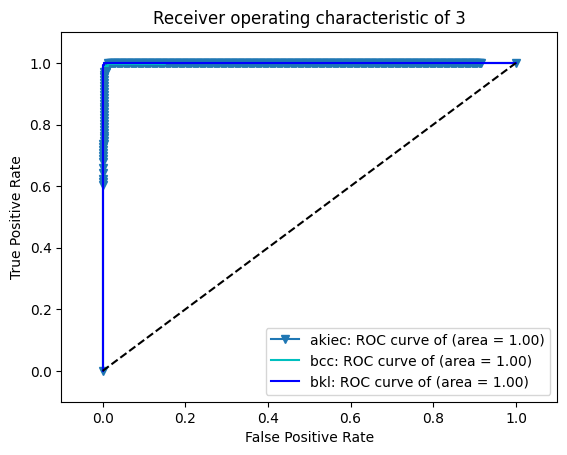

In [ ]:

plt.plot(fpr[0], tpr[0],'v-',label='akiec: ROC curve of (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='bcc: ROC curve of (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='bkl: ROC curve of (area = %0.2f)' % roc_auc[2])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of %s'%targetnames[i])
plt.legend(loc="lower right")
plt.show()